### Imports

In [1]:
import json
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

C:\Users\rbdf\anaconda3\envs\tensor\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# PATH  = "./train2014/"
PATH  = "C:/Users/rbdf/Documents/Datasets/PraCegoVer/images/"
ANNOTATION_PATH = "C:/Users/rbdf/Documents/Codes/Projeto3/Annotations_PraCegoVer_fix.json"

DATA_PATH = "C:/Users/rbdf/Documents/Datasets/PraCegoVer/images"
# ANNOTATION_PATH = "C:/Users/rbdf/Documents/Codes/Projeto3/Annotations_PraCegoVer.json"
# images = glob(PATH  + "*.jpg")
# len(images)

## Tentativa 2

### https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

#### Carregando arquivos

In [10]:
df = pd.read_json(ANNOTATION_PATH)
df.head()

,caption,raw_caption,filename,user,date
0,À esquerda parte da face de Marília Pêra com u...,"Obrigada, Marília! 👏👏👏🎭\n#PraCegoVer À esquerd...",i-00000000.jpg,23145220cd54ee72928d6f0d781190f124c02fff36d3bf...,2015-05-12
1,"Ilustração com fundo amarelo claro, mostrando ...",Descrição da imagem #PraCegoVer: Ilustração c...,i-00000001.jpg,0d1538197910ab18a6c208ffe3a49292a30d13306c7b6b...,2015-05-12
2,Seis pessoas em pé cada um sinaliza um número ...,Parte do ministério Mãos Ungidas. Confra minis...,i-00000002.jpg,23145220cd54ee72928d6f0d781190f124c02fff36d3bf...,2015-06-12
3,"foto de um copo de chope é um lanche ""boca de ...",Amo sexta à tarde!!! Descrição da Imagem #PraC...,i-00000003.jpg,3a71e290741b0a231ef1de65d110d60b7e86512cec3dba...,2015-11-13
4,"Parede coberta por azulejos cinzas. Ao centro,...",Da minha janela vejo vida e resistência.\nResi...,i-00000004.jpg,23145220cd54ee72928d6f0d781190f124c02fff36d3bf...,2015-11-15


In [11]:
# df.to_csv('PraCegoVer.csv')

In [12]:
# landmarks_frame = pd.read_csv('data/faces/face_landmarks.csv')

n = 65
img_name = df.iloc[n, 2]
caption = df.iloc[n, 0]
# caption = np.asarray(caption)
# caption = caption.astype('float').reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Image Caption: {}'.format(caption))
# print('First 4 Landmarks: {}'.format(caption]))

Image name: i-00000065.jpg
Image Caption: Selfie. Uso um turbante-faixa na cor rosa, que tem um nó na lateral esquerda da testa. No outro lado, os cachos em cascata tomam toda a lateral da cabeça. Uso grandes brincos de resina amarelos em formato triangular com as pontas arredondadas e visto uma camiseta branca com desenhos geométricos coloridos na metade esquerda. Estou maquiada com os olhos delineados pretos e um batom rosa claro.].


Selfie. Uso um turbante-faixa na cor rosa, que tem um nó na lateral esquerda da testa. No outro lado, os cachos em cascata tomam toda a lateral da cabeça. Uso grandes brincos de resina amarelos em formato triangular com as pontas arredondadas e visto uma camiseta branca com desenhos geométricos coloridos na metade esquerda. Estou maquiada com os olhos delineados pretos e um batom rosa claro.].


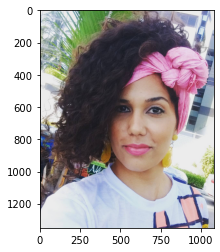

In [13]:
def show_landmarks(image, caption):
    """Show image with landmarks"""
    print(caption)
    plt.imshow(image)
    plt.pause(0.001)  # pause a bit so that plots are updated

plt.figure()
show_landmarks(io.imread(os.path.join(PATH, img_name)),
               caption)

plt.show()

#### Dataset class

In [14]:
class PraCegoVer(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.dataset_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.dataset_frame)
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        img_name = os.path.join(self.root_dir,
                               self.dataset_frame.iloc[idx,3])
        image = io.imread(img_name)
        caption = self.dataset_frame.iloc[idx,1]
        sample = {'image':image, 'caption':caption}
        
        if self.transform:
            sample = self.transform(sample)
        return sample

In [15]:
# Testando
cego_dataset = PraCegoVer(csv_file='PraCegoVer.csv', root_dir = PATH)

In [16]:
# ddf = pd.read_csv('PraCegoVer.csv')
# ddf.head()

À esquerda parte da face de Marília Pêra com um pequeno sorriso. À direita, sobre um fundo azul em letras brancas o texto: Uma estrela dos palcos que foi iluminar o céu. Marília Pêra 1943 - 2015;


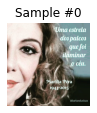

Ilustração com fundo amarelo claro, mostrando uma freira retratada em traços infantis e fofinhos, nariz arredondado e sorriso discreto. Está com o braço esquerdo erguido, segurando um crucifixo preso por uma alça. No rodapé da imagem está escrito: "As pessoas que espalham amor não têm tempo nem disposição para jogar pedras". Irmã Dulce.

Ilustração e descrição de Patricia Braille.


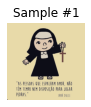

Seis pessoas em pé cada um sinaliza um número em Libras. À esquerda Sheila: um, Daniel: três e Bárbara: sete. Ao centro uma árvore de natal com decoração dourada e vermelha. À direita, Camila: nove, Marcelle: dez e Kátia: onze. Os cinco primeiros usam uma camiseta azul com o desenho do sinal de Jesus em Libras. A sexta pessoa usa uma blusa listrada em preto e branco.


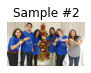

foto de um copo de chope é um lanche "boca de anjo" de presunto de parma, cream cheese, mozarela de búfala e manjericão!! Delicioso.


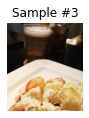

In [17]:
fig=plt.figure()

for i in range(len(cego_dataset)):
    sample = cego_dataset[i]

    # print(sample['caption'])

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break

In [37]:
cego_dataset[0]['image'].shape[:2]

(1080, 1080)

#### Transform

In [74]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, caption = sample['image'], sample['caption']

#         h, w = image.shape[:2]
#         if isinstance(self.output_size, int):
#             if h > w:
#                 new_h, new_w = self.output_size * h / w, self.output_size
#             else:
#                 new_h, new_w = self.output_size, self.output_size * w / h
#         else:
#             new_h, new_w = self.output_size

#         new_h, new_w = int(new_h), int(new_w)

        # img = transform.resize(image, (new_h, new_w))
        img = transform.resize(image, (self.output_size, self.output_size))
        
        return {'image': img, 'caption': caption}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, caption = sample['image'], sample['caption']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]
        
        return {'image': image, 'caption': caption}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, caption = sample['image'], sample['caption']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'caption': caption}

In [30]:
# mean = [0.4363, 0.4328, 0.3291]
# std = [0.2129, 0.2075, 0.2038]

# train_transforms = transforms.Compose([
#     transforms.ToPILImage(),
#     transforms.Resize((128,128)),
#     transforms.ToTensor(),
#     transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
# ])

Selfie. Uso um turbante-faixa na cor rosa, que tem um nó na lateral esquerda da testa. No outro lado, os cachos em cascata tomam toda a lateral da cabeça. Uso grandes brincos de resina amarelos em formato triangular com as pontas arredondadas e visto uma camiseta branca com desenhos geométricos coloridos na metade esquerda. Estou maquiada com os olhos delineados pretos e um batom rosa claro.].


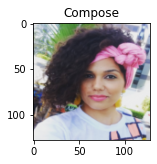

In [75]:
scale = Rescale(128)
# crop = RandomCrop(128)
composed = transforms.Compose([Rescale(128)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = cego_dataset[65]
for i, tsfrm in enumerate([composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)

plt.show()

In [44]:
transformed_sample['image'].shape

(160, 128, 3)

In [76]:
# mean = [0.4363, 0.4328, 0.3291]
# std = [0.2129, 0.2075, 0.2038]
transfor_pipeline = transforms.Compose([
    # transforms.Resize((128,128)),
    # transforms.ToTensor(),
    Rescale(128),
    ToTensor(),
    # transforms.Normalize(
    # mean=0.5,
    # std=0.5)
    # transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
])

transformed_dataset = PraCegoVer(csv_file='PraCegoVer.csv', root_dir = PATH,
                                           transform=transfor_pipeline
                                           )



In [61]:
# sample
# transformed_dataset.__dict__
transformed_dataset[0]['image'].shape

torch.Size([128, 128, 3])

À esquerda parte da face de Marília Pêra com um pequeno sorriso. À direita, sobre um fundo azul em letras brancas o texto: Uma estrela dos palcos que foi iluminar o céu. Marília Pêra 1943 - 2015;
torch.Size([3, 128, 128])


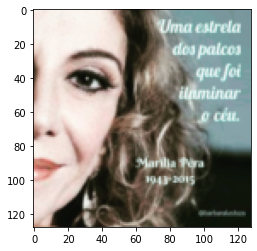

Ilustração com fundo amarelo claro, mostrando uma freira retratada em traços infantis e fofinhos, nariz arredondado e sorriso discreto. Está com o braço esquerdo erguido, segurando um crucifixo preso por uma alça. No rodapé da imagem está escrito: "As pessoas que espalham amor não têm tempo nem disposição para jogar pedras". Irmã Dulce.

Ilustração e descrição de Patricia Braille.
torch.Size([3, 128, 128])


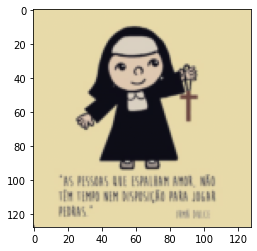

Seis pessoas em pé cada um sinaliza um número em Libras. À esquerda Sheila: um, Daniel: três e Bárbara: sete. Ao centro uma árvore de natal com decoração dourada e vermelha. À direita, Camila: nove, Marcelle: dez e Kátia: onze. Os cinco primeiros usam uma camiseta azul com o desenho do sinal de Jesus em Libras. A sexta pessoa usa uma blusa listrada em preto e branco.
torch.Size([3, 128, 128])


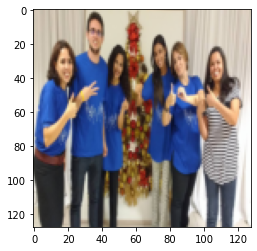

foto de um copo de chope é um lanche "boca de anjo" de presunto de parma, cream cheese, mozarela de búfala e manjericão!! Delicioso.
torch.Size([3, 128, 128])


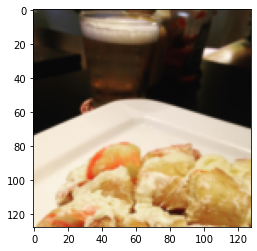

In [80]:
for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]
    
    print(sample['caption'])
    print(sample['image'].shape)
    plt.imshow(sample['image'].permute(1, 2, 0))
    plt.pause(0.001)  # pause a bit so that plots are updated

    # print(i, sample['image'], sample['caption'])

    if i == 3:
        break

### DataLoader

In [83]:
dataloader = DataLoader(transformed_dataset, batch_size=8,
                        shuffle=True, num_workers=0)
# dataloader = DataLoader(transformed_dataset, batch_size=8, pin_memory=True,
                        # shuffle=True, num_workers=0, drop_last=True)


# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, caption_batch = \
            sample_batched['image'], sample_batched['caption']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    grid_border_size = 2

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    


In [86]:
# dataloader[5]

TypeError: 'DataLoader' object is not subscriptable

0 torch.Size([8, 3, 128, 128]) ['Foto de uma mulher de idade com cabelos brancos, lisos e curtos. Ela veste uma calça vermelha, um tricot amarelo, óculos escuros e segura na mão esquerda uma bolsa pequena rosa.', 'A foto em destaque é do Vg - Burger Vegetariano sobre fundo na cor bordô. Na metade direita da imagem, está o texto: "Vegetariano" seguido do ícone do burger, nos padrões do nosso menu inspirado na tabela periódica, e o texto "Hambúrguer de grão de bico".\nNo canto inferior esquerdo está o selo de excelência, com a logomarca do Tripadvisor e os dizeres: "2017 Certificado de excelência".\nNo canto inferior direito está a foto da atração musical de hoje com os dizeres: "Hoje: Dentinho Arueira".\nNa Borda superior, a logomarca do O Alquimista e na borda inferior, o endereço: "Rua Giesta, 641, morrinhos - Bombinhas".', 'Arte em tons de lilás com uma foto minha ao centro, sentada, de pernas cruzadas. Uso uma camiseta preta com logo do Movimento e calça preta. Sobre a imagem, há o 

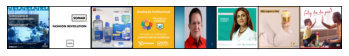

In [90]:
# if you are using Windows, uncomment the next line and indent the for loop.
# you might need to go back and change "num_workers" to 0.

if __name__ == '__main__':
    for i_batch, sample_batched in enumerate(dataloader):
        print(i_batch, sample_batched['image'].size(),
              sample_batched['caption'])
        # break
        # observe 4th batch and stop.
        if i_batch == 1:
            plt.figure()
            show_landmarks_batch(sample_batched)
            plt.axis('off')
            plt.ioff()
            plt.show()
            break

In [ ]:
DataLoader.__dict__

In [ ]:
# print(dataloader)
help(DataLoader)